In [1]:
# create a convenience function for dickey fuller test of stationarity #

def dickey_fuller(series,title='Your Dataset'):
    from statsmodels.tsa.stattools import adfuller
    
    print(f'Welcome to the magical Dickey Fuller Test of {title}\n')
    result = adfuller(series.dropna(),autolag='AIC')
    
    df = pd.Series(result[0:4],index=['test-statistics','p-Value','#lags','#obs'])
    
    print (df.to_string())
    
    for key,value in result[4].items():
        print (f'critical {key} value is {value}')
               
                 
    if result[1] < 0.05:
        print ('There is sufficient evidence against the Null Hypothesis')
        print ('We reject the Null Hypothesis')
        print ('Conclusion: The provided dataset is stationary')
    else:
        print ('There is not sufficient evidence against the Null Hypothesis')
        print ('We fail to reject the Null Hypothesis')
        print ('Conclusion: The provided dataset is non-stationary')
    

# ARMA - For Stationary Dataset

In [2]:
# usual import of the libraries #
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
import warnings
warnings.filterwarnings(action='ignore')

In [4]:
from pylab import rcParams
rcParams['figure.figsize']=12,5

In [19]:
# import the stationary female birth dataset #
female = pd.read_csv('../Data/DailyTotalFemaleBirths.csv',index_col='Date',parse_dates=True)
female.index.freq = 'D'
female.dropna(inplace=True)

In [20]:
dickey_fuller(female['Births'],title='Daily Total Female Birth Dataset')

Welcome to the magical Dickey Fuller Test of Daily Total Female Birth Dataset

test-statistics     -4.808291
p-Value              0.000052
#lags                6.000000
#obs               358.000000
critical 1% value is -3.448748905151901
critical 5% value is -2.8696473721448728
critical 10% value is -2.5710891239349585
There is sufficient evidence against the Null Hypothesis
We reject the Null Hypothesis
Conclusion: The provided dataset is stationary


In [6]:
from pmdarima import auto_arima

In [9]:
auto_arima(female['Births'],start_p=1,max_p=5,start_q=1,max_q=5,trace=True,seasonal=False).summary()

Performing stepwise search to minimize aic
Fit ARIMA(1,1,1)x(0,0,0,0) [intercept=True]; AIC=2460.154, BIC=2475.743, Time=0.331 seconds
Fit ARIMA(0,1,0)x(0,0,0,0) [intercept=True]; AIC=2650.760, BIC=2658.555, Time=0.016 seconds
Fit ARIMA(1,1,0)x(0,0,0,0) [intercept=True]; AIC=2565.234, BIC=2576.925, Time=0.083 seconds
Fit ARIMA(0,1,1)x(0,0,0,0) [intercept=True]; AIC=2463.584, BIC=2475.275, Time=0.163 seconds
Fit ARIMA(0,1,0)x(0,0,0,0) [intercept=False]; AIC=2648.768, BIC=2652.665, Time=0.018 seconds
Fit ARIMA(2,1,1)x(0,0,0,0) [intercept=True]; AIC=2461.271, BIC=2480.757, Time=0.430 seconds
Fit ARIMA(1,1,2)x(0,0,0,0) [intercept=True]; AIC=2460.751, BIC=2480.237, Time=1.184 seconds
Near non-invertible roots for order (1, 1, 2)(0, 0, 0, 0); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.996)
Fit ARIMA(0,1,2)x(0,0,0,0) [intercept=True]; AIC=2460.722, BIC=2476.311, Time=0.377 seconds
Fit ARIMA(2,1,0)x(0,0,0,0) [intercept=True]; AIC=2536.154, BIC

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  365
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -1226.077
Date:                Fri, 10 Jul 2020   AIC                           2460.154
Time:                        20:07:47   BIC                           2475.743
Sample:                             0   HQIC                          2466.350
                                - 365                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0132      0.014      0.975      0.330      -0.013       0.040
ar.L1          0.1299      0.059      2.217      0.027       0.015       0.245
ma.L1         -0.9694      0.016    -62.235      0.000      -1.000      -0.939
sigma2        48.9989      3.432     14.279      0.000      42.273      55.725
===================================================================================
Ljung-Box (Q):                       36.69   Jarque-Bera (JB):                26.17
Prob(Q):                              0.62   Prob(JB):                         0.00
Heteroskedasticity (H):               0.97   Skew:                             0.58
Prob(H) (two-sided):                  0.85   Kurtosis:                         3.62
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [10]:
from statsmodels.tsa.arima_model import ARMA

In [14]:
arma_model = ARMA(female['Births'],order=(1,1))

In [15]:
arma_fit = arma_model.fit()

In [18]:
# split the data into train and test set - should have been done earlier !! 
train_female = female.iloc[:350]
test_female = female.iloc[350:]

In [25]:
test_predictions = arma_fit.predict(start=len(train_female),end=len(train_female)+len(test_female)-1).rename('Test Predictions')

In [26]:
len(test_predictions)

15

In [27]:
len(test_female)

15

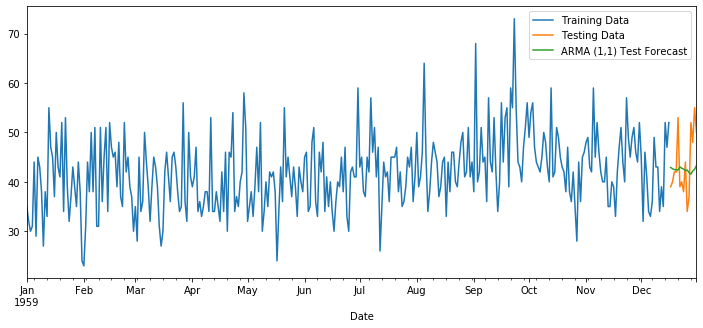

In [30]:
train_female['Births'].plot(legend=True,label='Training Data')
test_female['Births'].plot(legend=True,label='Testing Data')
test_predictions.plot(legend=True,label='ARMA (1,1) Test Forecast')

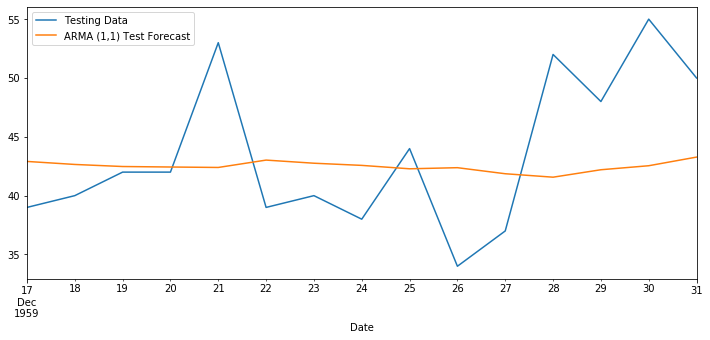

In [31]:
test_female['Births'].plot(legend=True,label='Testing Data')
test_predictions.plot(legend=True,label='ARMA (1,1) Test Forecast')

In [32]:
# Model Evaluation #
from statsmodels.tools.eval_measures import rmse

In [34]:
print (rmse(test_female['Births'],test_predictions))

6.426093957187014


In [36]:
test_female['Births'].mean()

43.53333333333333

In [37]:
test_female['Births'].std()

6.490285781366604

- Our ARMA model is acceptable

### use the model to re-train on the entire dataset and predict the true forecast 

In [38]:
arma_model = ARMA(female['Births'],order=(1,1))

In [39]:
arma_fit = arma_model.fit()

In [41]:
forecast = arma_fit.predict(start=len(female),end=len(female)+15,dynamic=False).rename('Forecast Births')

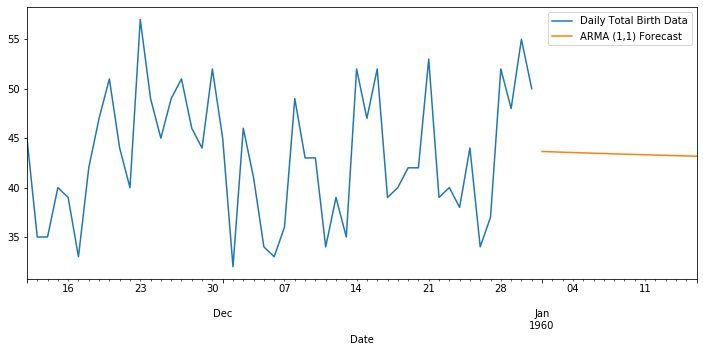

In [47]:
female['Births'].iloc[-50:].plot(legend=True,label='Daily Total Birth Data')
forecast.plot(legend=True,label='ARMA (1,1) Forecast')

# ARIMA on the non stationary dataset 

In [48]:
# usual imports #
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns 

%matplotlib inline


In [49]:
# get rid of unwanted warnings due to the library constructs #
import warnings
warnings.filterwarnings(action='ignore')

In [50]:
# consistent plot size #
from pylab import rcParams
rcParams['figure.figsize']=12,5

In [97]:
# import the required statmodels methods #
from statsmodels.tsa.arima_model import ARMA,ARIMA,ARIMAResults,ARMAResults
from statsmodels.graphics.tsaplots import plot_acf,month_plot,quarter_plot,plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from pmdarima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [55]:
# import the dataset #
trade = pd.read_csv('../Data/TradeInventories.csv',index_col='Date',parse_dates=True)

In [56]:
trade.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 264 entries, 1997-01-01 to 2018-12-01
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Inventories  264 non-null    int64
dtypes: int64(1)
memory usage: 4.1 KB


In [57]:
trade.dropna(inplace=True)

In [58]:
trade.head()

,Inventories
Date,
1997-01-01,1301161
1997-02-01,1307080
1997-03-01,1303978
1997-04-01,1319740
1997-05-01,1327294


In [59]:
trade.index.freq = 'MS'

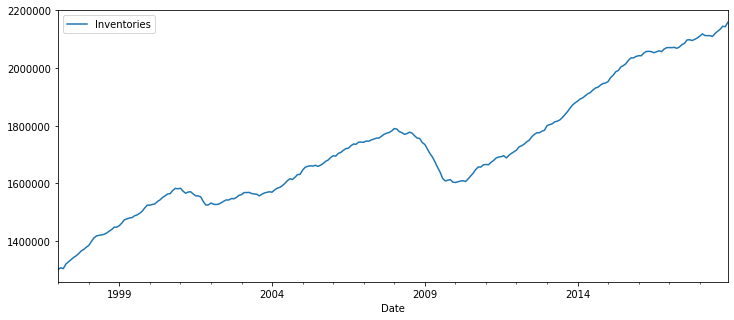

In [60]:
trade.plot()

In [61]:
decompose = seasonal_decompose(trade['Inventories'],model='additive')

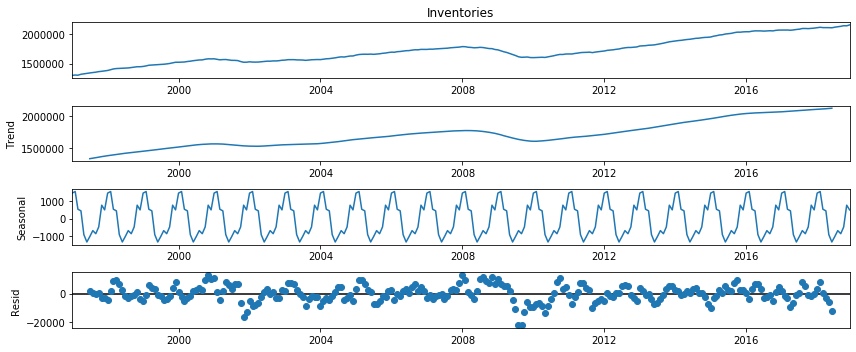

In [62]:
decompose.plot();

In [63]:
dickey_fuller(trade['Inventories'],title='Trade Inventory Dataset')

Welcome to the magical Dickey Fuller Test of Trade Inventory Dataset

test-statistics     -0.087684
p-Value              0.950652
#lags                5.000000
#obs               258.000000
critical 1% value is -3.455952927706342
critical 5% value is -2.8728086526320302
critical 10% value is -2.572774990685656
There is not sufficient evidence against the Null Hypothesis
We fail to reject the Null Hypothesis
Conclusion: The provided dataset is non-stationary


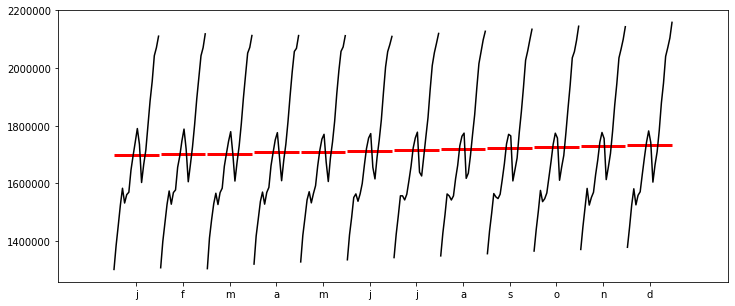

In [66]:
month_plot(trade['Inventories']);

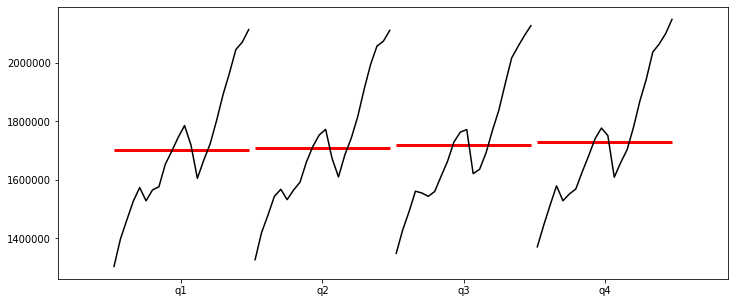

In [68]:
quarter_plot(trade['Inventories'].resample(rule='Q').mean());

#### The trade inventory dataset does not seem to have seasonality 
####  The data is non-stationary as indicated by the Dickey Fuller test

In [70]:
# divide the data into the training and testing 
train_trade = trade.iloc[:240]
test_trade = trade.iloc[240:]

In [109]:
# decide the order of the ARIMA model
auto_arima(train_trade['Inventories'],seasonal=False,trace=True,m=12,d=None).summary()


Performing stepwise search to minimize aic
Fit ARIMA(2,1,2)x(0,0,0,0) [intercept=True]; AIC=4896.057, BIC=4916.916, Time=0.651 seconds
Fit ARIMA(0,1,0)x(0,0,0,0) [intercept=True]; AIC=4866.775, BIC=4873.728, Time=0.033 seconds
Fit ARIMA(1,1,0)x(0,0,0,0) [intercept=True]; AIC=4925.015, BIC=4935.444, Time=0.116 seconds
Fit ARIMA(0,1,1)x(0,0,0,0) [intercept=True]; AIC=4869.206, BIC=4879.636, Time=0.108 seconds
Fit ARIMA(0,1,0)x(0,0,0,0) [intercept=False]; AIC=4919.618, BIC=4923.094, Time=0.018 seconds
Fit ARIMA(1,1,1)x(0,0,0,0) [intercept=True]; AIC=4902.931, BIC=4916.837, Time=0.241 seconds
Total fit time: 1.170 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  240
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -2431.387
Date:                Sat, 11 Jul 2020   AIC                           4866.775
Time:                        13:48:03   BIC                           4873.728
Sample:                             0   HQIC                          4869.577
                                - 240                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   3218.5230    515.292      6.246      0.000    2208.569    4228.477
sigma2      4.016e+07   3.24e+06     12.382      0.000    3.38e+07    4.65e+07
===================================================================================
Ljung-Box (Q):                      478.65   Jarque-Bera (JB):               101.30
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.78   Skew:                            -1.22
Prob(H) (two-sided):                  0.26   Kurtosis:                         5.05
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [78]:
from statsmodels.tsa.statespace.tools import diff

In [79]:
trade['d1'] =  diff(trade['Inventories'],k_diff=1)

In [80]:
trade.head()

,Inventories,d1
Date,,
1997-01-01,1301161,NaN
1997-02-01,1307080,5919.0
1997-03-01,1303978,-3102.0
1997-04-01,1319740,15762.0
1997-05-01,1327294,7554.0


In [81]:
# dickey fuller test on the first difference #
dickey_fuller(trade['d1'],'Trade Inventories first difference')

Welcome to the magical Dickey Fuller Test of Trade Inventories first difference

test-statistics     -3.412249
p-Value              0.010548
#lags                4.000000
#obs               258.000000
critical 1% value is -3.455952927706342
critical 5% value is -2.8728086526320302
critical 10% value is -2.572774990685656
There is sufficient evidence against the Null Hypothesis
We reject the Null Hypothesis
Conclusion: The provided dataset is stationary


In [92]:
model = ARIMA(train_trade['Inventories'],order=(1,1,1))

In [93]:
fitt = model.fit()

In [95]:
test_predictions = fitt.predict(start=len(train_trade),end=len(train_trade)+len(test_trade)-1,
                               typ='levels',dynamic=False).rename('ARIMA(1 1 1) Test Predictions')

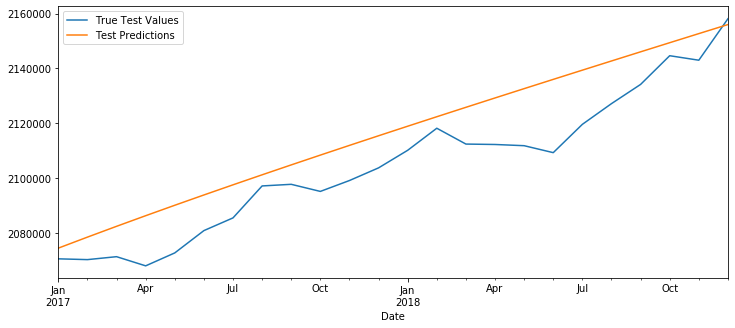

In [108]:
test_trade['Inventories'].plot(legend=True,label='True Test Values')
test_predictions.plot(legend=True,label='Test Predictions')

In [126]:
# model evaluation #
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse,mse

In [127]:
rmse = rmse(test_trade['Inventories'],test_predictions)
print (f'Root Mean Squared Error or Residual Standard Error = {rmse}')


Root Mean Squared Error or Residual Standard Error = 13386.269592299337


In [129]:
test_trade.describe()

,Inventories
count,2.400000e+01
mean,2.104721e+06
std,2.545222e+04
min,2.068029e+06
25%,2.084354e+06
50%,2.106524e+06
75%,2.118554e+06
max,2.158115e+06


In [130]:
# Retrain over the entire dataset and predict the true future forecast #
model = ARIMA(trade['Inventories'],order=(1,1,1))

In [131]:
fitt = model.fit()

In [133]:
forecast = fitt.predict(start=len(trade),end=len(trade)+24,typ='levels',dynamic=False).rename('ARIMA(1,1,1) Forecast')

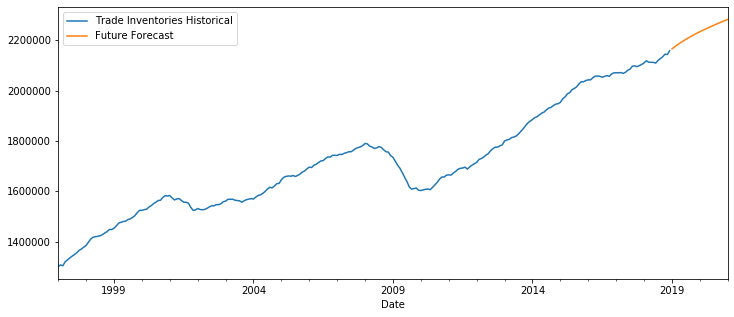

In [134]:
trade['Inventories'].plot(legend=True,label='Trade Inventories Historical')
forecast.plot(legend=True,label='Future Forecast')